# Problem set 4: Analyzing data

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/exercises-2022/master?urlpath=lab/tree/PS4/problem_set_4.ipynb)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
dst = pydst.Dst(lang='en')

# Tasks

## Import national account data from Denmark Statistics

Consider the following dictionary definitions:

In [50]:
columns_dict = {}
columns_dict['TRANSAKT'] = 'variable'
columns_dict['PRISENHED'] = 'unit'
columns_dict['TID'] = 'year'
columns_dict['INDHOLD'] = 'value'

var_dict = {} # var is for variable
var_dict['P.1 Output'] = 'Y'
var_dict['P.3 Final consumption expenditure'] = 'C'
var_dict['P.3 Government consumption expenditure'] = 'G'
var_dict['P.5 Gross capital formation'] = 'I'
var_dict['P.6 Export of goods and services'] = 'X'
var_dict['P.7 Import of goods and services'] = 'M'

unit_dict = {}
unit_dict['2010-prices, chained values'] = 'real'
unit_dict['Current prices'] = 'nominal'

**Step 1:** Download all of table `nah1`.

In [51]:
nah1 = dst.get_data(table_id = 'nah1', variables={'TRANSAKT':['*'], 'PRISENHED':['*'], 'TID':['*']})
# * means all

**Step 2:** Rename the columns using `columns_dict` and replace data using `var_dict` and `unit_dict`.

In [52]:
var_dict.items()

dict_items([('P.1 Output', 'Y'), ('P.3 Final consumption expenditure', 'C'), ('P.3 Government consumption expenditure', 'G'), ('P.5 Gross capital formation', 'I'), ('P.6 Export of goods and services', 'X'), ('P.7 Import of goods and services', 'M')])

In [53]:
nah1.rename(columns = columns_dict,inplace=True)

for key,value in var_dict.items():
    nah1.variable.replace(key, value, inplace=True)

for key,value in unit_dict.items():
    nah1.unit.replace(key, value, inplace=True)

In [54]:
nah1

,variable,unit,year,value
0,D.21 Taxes on products,real,1968,121454
1,D.21 Taxes on products,nominal,1968,14554
2,D.21-D.31 Taxes less subsidies on products,real,1968,123256
3,D.21-D.31 Taxes less subsidies on products,nominal,1968,12509
4,D.31 Subsidies on products,real,1968,4573
...,...,...,...,...
3355,P.72 Import of services,nominal,2017,399684
3356,Supply for final demand,real,2017,4898119
3357,Supply for final demand,nominal,2017,5157887
3358,Uses,real,2017,4898120


In [55]:
type(nah1)

pandas.core.frame.DataFrame

**Step 3:** Only keep rows where the variable is in `[Y, C, G, I, X, M]`. Afterwards convert the `value` column to a float.

In [65]:
# keep if in var_dict
'''
I = False
for key,value in var_dict.items():
    I = I | (nah1.variable == value)
nah1 = nah1[I] ''' # another way to do this

I = nah1['variable'].isin(var_dict.values())
nah1 = nah1[I]
nah1.value = nah1.value.astype('float')  # convert values to numeric
nah1

,variable,unit,year,value
6,Y,real,1968,1162778.0
7,Y,nominal,1968,167877.0
22,C,real,1968,612327.0
23,C,nominal,1968,77325.0
24,G,real,1968,195664.0
...,...,...,...,...
3335,I,nominal,2017,483615.0
3344,X,real,2017,1175129.0
3345,X,nominal,2017,1207825.0
3350,M,real,2017,1036756.0


**Step 4:** Discuss what the following summary statistics show.

In [59]:
nah1.groupby(['variable','unit']).describe()

year                                                       \
                 count    mean        std     min      25%     50%      75%   
variable unit                                                                 
C        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
G        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
I        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
M        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
X        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
Y        nominal  56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   
         real     56.0  1993.5  16.309506  1966.0  1979.75  1993.5  2007.25   

                         value                                         \
                     max count          mean           std        min   
variable unit                                                           
C        nominal  2021.0  56.0  7.864680e+05  5.172371e+05    62576.0   
         real     2021.0  56.0  1.059233e+06  2.801296e+05   549491.0   
G        nominal  2021.0  56.0  2.669041e+05  1.839642e+05    14768.0   
         real     2021.0  56.0  3.712531e+05  1.032769e+05   171307.0   
I        nominal  2021.0  56.0  2.298644e+05  1.590105e+05    21134.0   
         real     2021.0  56.0  2.778457e+05  1.097276e+05   127630.0   
M        nominal  2021.0  56.0  4.473470e+05  3.759254e+05    24406.0   
         real     2021.0  56.0  4.902730e+05  3.242823e+05   112171.0   
X        nominal  2021.0  56.0  5.028959e+05  4.287859e+05    23110.0   
         real     2021.0  56.0  5.701444e+05  3.649215e+05   123594.0   
Y        nominal  2021.0  56.0  1.829101e+06  1.282365e+06   144582.0   
         real     2021.0  56.0  2.338466e+06  8.275534e+05  1089347.0   

                                                                
                         25%        50%         75%        max  
variable unit                                                   
C        nominal   314858.00   722796.5  1263176.50  1747275.0  
         real      847042.50  1014769.5  1341092.00  1553077.0  
G        nominal   102028.25   238657.5   430446.25   608686.0  
         real      307787.75   351936.0   462233.25   536987.0  
I        nominal    79757.00   182014.5   352455.00   581922.0  
         real      183076.75   234810.0   354682.50   519130.0  
M        nominal   128332.75   293706.5   785699.50  1319708.0  
         real      212802.75   344339.5   792824.00  1164408.0  
X        nominal   124774.75   353569.5   863858.75  1487151.0  
         real      242032.00   457006.5   910779.50  1279017.0  
Y        nominal   661788.50  1553203.0  3025075.75  4443007.0  
         real     1609862.00  2159371.0  3140076.50  3836880.0

**Answer:** See A1.py

## Merge with population data from Denmark Statistics

Load population data from Denmark Statistics:

In [60]:
nah1

,variable,unit,year,value
6,Y,real,1968,1162778.0
7,Y,nominal,1968,167877.0
22,C,real,1968,612327.0
23,C,nominal,1968,77325.0
24,G,real,1968,195664.0
...,...,...,...,...
3335,I,nominal,2017,483615.0
3344,X,real,2017,1175129.0
3345,X,nominal,2017,1207825.0
3350,M,real,2017,1036756.0


In [61]:
pop = dst.get_data(table_id = 'FT', variables={'HOVEDDELE':['*'], 'TID':['*']})
pop.rename(columns={'TID':'year','INDHOLD':'population'},inplace=True)
I = pop.HOVEDDELE == 'All Denmark'
pop =  pop.loc[I,['year','population']]
pop.head(10)

,year,population
2,1834,1230964
3,1855,1507222
4,1890,2172380
5,1916,2921362
6,1935,3706349
7,1955,4448401
158,2010,5534738
160,1769,797584
161,1840,1289075
162,1860,1608362


**Question 1:** Merge the population and the national account data, so there is a new column called `population`. Use the **merge function**.

In [66]:
merged = pd.merge(nah1,pop,how='left',on=['year'])
merged.tail(10)

,variable,unit,year,value,population
662,C,real,2017,1462046.0,5748769.0
663,C,nominal,2017,1551992.0,5748769.0
664,G,real,2017,519113.0,5748769.0
665,G,nominal,2017,535347.0,5748769.0
666,I,real,2017,449353.0,5748769.0
667,I,nominal,2017,483615.0,5748769.0
668,X,real,2017,1175129.0,5748769.0
669,X,nominal,2017,1207825.0,5748769.0
670,M,real,2017,1036756.0,5748769.0
671,M,nominal,2017,1050472.0,5748769.0


**Answer:** See A2.py

**Question 2:** Merge the population on again, so there is a new column called `population_alt`. Use the **join method**.

In [67]:
pop_with_index = pop.set_index('year')
pop_with_index.rename(columns={'population':'population_alt'},inplace=True)
merged_with_index = merged.set_index('year')
merged_alt = merged_with_index.join(pop_with_index)
merged_alt.tail(10)

,variable,unit,value,population,population_alt
year,,,,,
2021,C,real,1553077.0,5840045.0,5840045.0
2021,C,nominal,1747275.0,5840045.0,5840045.0
2021,G,real,536987.0,5840045.0,5840045.0
2021,G,nominal,608686.0,5840045.0,5840045.0
2021,I,real,519130.0,5840045.0,5840045.0
2021,I,nominal,581922.0,5840045.0,5840045.0
2021,X,real,1279017.0,5840045.0,5840045.0
2021,X,nominal,1487151.0,5840045.0,5840045.0
2021,M,real,1164408.0,5840045.0,5840045.0


**Answer:** See A3.py

## Split-apply-combine-(plot)

Consider the following **split-apply-combine-plot:**

In [74]:
nah1_true = nah1.copy()
nah1_true = nah1_true.sort_values(by=['year'], ascending = True)

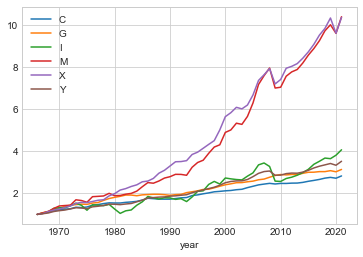

In [75]:
# a. split
nah1_true_grouped = nah1_true.groupby(['variable','unit'])
nah1_true_grouped_first = nah1_true_grouped.value.first()
nah1_true_grouped_first.name = 'first'

# b. apply
nah1_true.set_index(['variable','unit','year'],inplace=True)
nah1_true = nah1_true.join(nah1_true_grouped_first,how='left',on=['variable','unit'])
nah1_true.reset_index(inplace=True)

# c. combine
nah1_true['indexed'] = nah1_true['value']/nah1_true['first']

# d. plot
def plot(df):
    df_indexed = df.set_index('year')
    I = df_indexed.unit == 'real'
    df_indexed[I].groupby(['variable'])['indexed'].plot(legend=True);
    
plot(nah1_true)

**Question** Implement the same split-apply-combine as above using `transform`.

In [ ]:
def first(x): # select the first element in a series
    return x.iloc[0]

# nah1_alt = nah1_final.copy()
# grouped = nah1_alt.groupby(?)
#nah1_alt[?] = ?.transform(lambda x: ?)
#nah1_alt.head()

**Answer:** See A4.py

# Problem: The Housing market


## Housing data

**Note:** The file `data/bm010_parcel.xlsx` has been downloaded from http://rkr.statistikbank.dk/201.

**Question:** Go through the cell below and ensure you understand ALL commands.

In [ ]:
# a. load data
prices = pd.read_excel('data/bm010_parcel.xlsx', skiprows=2)
prices.rename(columns={'Unnamed: 2': 'municipality'}, inplace=True)

# b. delete columns
del prices['Unnamed: 0']
del prices['Unnamed: 1']

# c. rename time columns: 1992K1 -> price19921
time_dict = {} 
for y in range(1992,2021+1): 
    for k in range(1,4+1): 
        str_from = f'{y}K{k}'
        str_to   = f'price{y}{k}'
        time_dict[str_from] = str_to
prices = prices.rename(columns = time_dict)        

# d. drop missing
prices = prices.dropna()

# e. convert to long
prices_long = pd.wide_to_long(prices, stubnames='price', i='municipality', j='year_quarter')
prices_long.reset_index(inplace=True)

# f. drop missing and convert to float
I = prices_long.loc[prices_long.price == '..']
prices_long.drop(I.index, inplace=True)
prices_long.price = prices_long.price.astype('float')

# g. create date variable
prices_long['d'] = (prices_long.year_quarter.astype(str).str[:4] # grab the year, first four digits
          + 'Q' # add the letter Q 
          + prices_long.year_quarter.astype(str).str[4]) # the quarter (fifth digit)
prices_long['date'] = pd.to_datetime(prices_long.d)

# h. cleanup 
del prices_long['year_quarter']
del prices_long['d']

prices_long.head()

## Population data

**Question:** Go through the cell below and ensure you understand ALL commands.

In [ ]:
# a. load data
pop = dst.get_data(table_id='FOLK1A', variables={'Alder':['IALT'], 'CIVILSTAND':['TOT'], 'Køn':['TOT'], 'Tid':['*'], 'OMRÅDE':['*']})

# b. drop and rename columns
for v in ['ALDER', 'CIVILSTAND', 'KØN']: 
    del pop[v]
pop = pop.rename(columns = {'INDHOLD':'population', 'OMRÅDE': 'municipality'})

# c. drop non-municipalities
for val in ['Region', 'All']: 
    I = pop['municipality'].str.contains(val)
    pop.drop(pop[I].index, inplace=True)

# d. convert to date
pop['date'] = pd.to_datetime(pop.TID)
del pop['TID']

pop.head()

## Analysis

**Problem:** Analyze the co-variation betwen population growth and house price growth. Reproduce the graphs below. 

**Hint:** For the second one consider the `agg` method (similar to but different from `transform`, Google it).

In [ ]:
# write your code here 

**Answer:** See A5.py for difference within total population. See A6.py for difference within municipality